In [323]:
## import libraries
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector, Bidirectional, CuDNNLSTM
import matplotlib.pyplot as plt
#import os
import tensorflow as tf
from keras.regularizers import l2

In [324]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [325]:
n_step = 9

In [326]:
def split(data, depth):
    dataset = data
    depth = depth
    X = np.zeros([int(depth), n_step, 3])
    Y = np.zeros([int(depth), n_step, 3])
    c = 0
    d = 0
    
    for i in range(int(depth)):
        for j in range(n_step):
            if d < dataset.shape[0]:
                X[i,j,:] = dataset[d, c:c+3]
                Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
                
                if ((c+3*n_step+3) != (dataset.shape[1])):
                    c +=3
                else:
                    c = 0
                    d += 1
        if (c-3) > 0:
            c = (c - 3*n_step + 3)
        else:
            c = c
            
    return X, Y

In [327]:
dataset = pd.read_csv('/home/lab606a/Documents/20200331/fixed/original data 60hz/right6.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(919, 120)

In [328]:
maxlen_train = dataset.shape[1]+(n_step-1)*3
maxlen_train

144

In [329]:
dataset = sequence.pad_sequences(dataset, maxlen=maxlen_train, padding='post', dtype='float32')
dataset.shape

(919, 144)

In [330]:
depth_train = (int(dataset.shape[1]/3)+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows

In [331]:
x_train, y_train = split(data=dataset, depth=depth_train)

In [332]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])))
#model.add(LSTM(256, activation='linear', return_sequences=True))
#model.add(LSTM(128, activation='linear', return_sequences=True))
#model.add(LSTM(64, activation='linear', return_sequences=True))
#model.add(CuDNNLSTM(64))
model.add(RepeatVector(x_train.shape[1]))
#model.add(LSTM(32, activation='linear', return_sequences=True))
#model.add(CuDNNLSTM(64, return_sequences=True))
#model.add(LSTM(128, activation='linear', return_sequences=True))
#model.add(LSTM(64, activation='linear', return_sequences=True))
model.add(CuDNNLSTM(128, return_sequences=True ))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [333]:
#model.summary()

In [356]:
history = model.fit(x_train, y_train, batch_size=2000, epochs=100, shuffle=True)

Epoch 1/100
28489/28489 [==============================] - 0s 6us/step - loss: 0.4994 - acc: 0.8364
Epoch 2/100
28489/28489 [==============================] - 0s 10us/step - loss: 0.4946 - acc: 0.8386
Epoch 3/100
28489/28489 [==============================] - 0s 10us/step - loss: 0.4946 - acc: 0.8371
Epoch 4/100
28489/28489 [==============================] - 0s 10us/step - loss: 0.4885 - acc: 0.8377
Epoch 5/100
28489/28489 [==============================] - 0s 10us/step - loss: 0.4923 - acc: 0.8381
Epoch 6/100
28489/28489 [==============================] - 0s 10us/step - loss: 0.4915 - acc: 0.8373
Epoch 7/100
28489/28489 [==============================] - 0s 7us/step - loss: 0.4962 - acc: 0.8360
Epoch 8/100
28489/28489 [==============================] - 0s 7us/step - loss: 0.4917 - acc: 0.8394
Epoch 9/100
28489/28489 [==============================] - 0s 6us/step - loss: 0.4872 - acc: 0.8336
Epoch 10/100
28489/28489 [==============================] - 0s 7us/step - loss: 0.4870 - acc: 0

28489/28489 [==============================] - 0s 6us/step - loss: 1.4020 - acc: 0.8323
Epoch 83/100
28489/28489 [==============================] - 0s 7us/step - loss: 0.9650 - acc: 0.8220
Epoch 84/100
28489/28489 [==============================] - 0s 7us/step - loss: 0.8123 - acc: 0.8294
Epoch 85/100
28489/28489 [==============================] - 0s 7us/step - loss: 1.0505 - acc: 0.8240
Epoch 86/100
28489/28489 [==============================] - 0s 9us/step - loss: 0.9143 - acc: 0.8262
Epoch 87/100
28489/28489 [==============================] - 0s 9us/step - loss: 0.7708 - acc: 0.8368
Epoch 88/100
28489/28489 [==============================] - 0s 9us/step - loss: 0.8321 - acc: 0.8220
Epoch 89/100
28489/28489 [==============================] - 0s 9us/step - loss: 2.6198 - acc: 0.8427
Epoch 90/100
28489/28489 [==============================] - 0s 9us/step - loss: 4.2779 - acc: 0.8492
Epoch 91/100
28489/28489 [==============================] - 0s 9us/step - loss: 2.9294 - acc: 0.8501
Epo

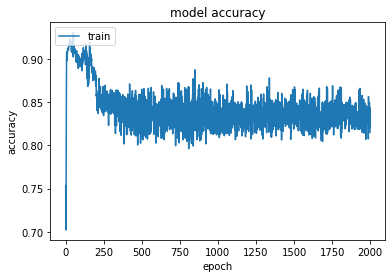

In [335]:
# plot accuracy history
# summarize history for accuracy 
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#acc_png = './training history/' + file_name + '_accuracy.png'
#plt.savefig(acc_png)
plt.show()

In [336]:
print(x_train[0,:,:])
print(y_train[0,:,:])

[[ 71.85169983 292.38400269  41.28540039]
 [ 70.57920074 281.4960022   41.76449966]
 [ 69.6207962  268.5710144   42.14170074]
 [ 68.95770264 255.15299988  42.21780014]
 [ 68.08509827 243.55999756  41.86970139]
 [ 67.26319885 231.42500305  41.28480148]
 [ 66.68589783 220.98699951  40.08089828]
 [ 66.3757019  209.06399536  38.88159943]
 [ 66.08239746 197.70500183  37.75889969]]
[[ 65.5687027  187.79499817  35.46580124]
 [ 65.51470184 176.63800049  33.8655014 ]
 [ 65.47389984 165.21499634  32.15859985]
 [ 65.40820312 155.1499939   29.57559967]
 [ 65.53690338 144.83999634  26.74040031]
 [ 65.84729767 134.35600281  23.87150002]
 [ 66.13880157 124.36000061  20.9843998 ]
 [ 66.58719635 114.24500275  17.72929955]
 [ 66.99629974 105.16999817  14.09879971]]


In [337]:
np.set_printoptions(suppress=True)

In [357]:
y_pred = model.predict(x_train[0,:,:].reshape(1,9,3), verbose=1)
print(y_pred)

1/1 [==============================] - 0s 14ms/step
[[[ 66.163574 186.55458   36.291092]
  [ 65.893326 175.03714   33.96731 ]
  [ 65.698586 164.10616   32.069923]
  [ 65.66219  153.1769    30.190989]
  [ 65.852806 142.56151   27.263258]
  [ 66.12531  131.88641   24.60906 ]
  [ 66.68848  121.26474   21.477142]
  [ 66.944466 111.5303    18.171244]
  [ 67.216415 101.367035  14.751237]]]


In [358]:
#
error = y_train[0,:,:].reshape(1,9,3)-y_pred
error

array([[[-0.59487152,  1.24041748, -0.82529068],
        [-0.37862396,  1.6008606 , -0.10181046],
        [-0.22468567,  1.10884094,  0.08867645],
        [-0.25399017,  1.97309875, -0.61538887],
        [-0.31590271,  2.27848816, -0.52285767],
        [-0.27801514,  2.46958923, -0.73756027],
        [-0.54967499,  3.09526062, -0.49274254],
        [-0.35726929,  2.71470642, -0.44194412],
        [-0.22011566,  3.80296326, -0.65243721]]])

In [319]:
#model.save('./saved model/20200505/prediction_right6')